Adapter model = h94/IP-Adapter

---

diffusion  model = SDXL





*   IP-Adapter is an image prompt adapter that can be plugged into diffusion models.
*   This adapter can be reused with other models finetuned from the same base model and it can be combined with other adapters like ControlNet.


*   **decoupled cross-attention mechanism** - adds a separate cross-attention layer just for image features instead of using the same cross-attention layer for both text and image features.
*   Task: text-to-image, image-to-image, and inpainting




In [1]:
!pip install -q torch "torchvision==0.19.0" "diffusers==0.30.1" "transformers==4.44.2" "accelerate==0.33.0" "invisible-watermark>=0.2.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

# Text-to-image



* **set_ip_adapter_scale()** method controls the amount of text or image conditioning to apply to the model.
* A value of 1.0 means the model is only conditioned on the image prompt.



In [ ]:
from diffusers import AutoPipelineForText2Image, AutoPipelineForImage2Image
from diffusers.utils import load_image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16).to("cuda")
pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="sdxl_models", weight_name="ip-adapter_sdxl.bin")
pipeline.set_ip_adapter_scale(0.6)

  0%|          | 0/100 [00:00<?, ?it/s]

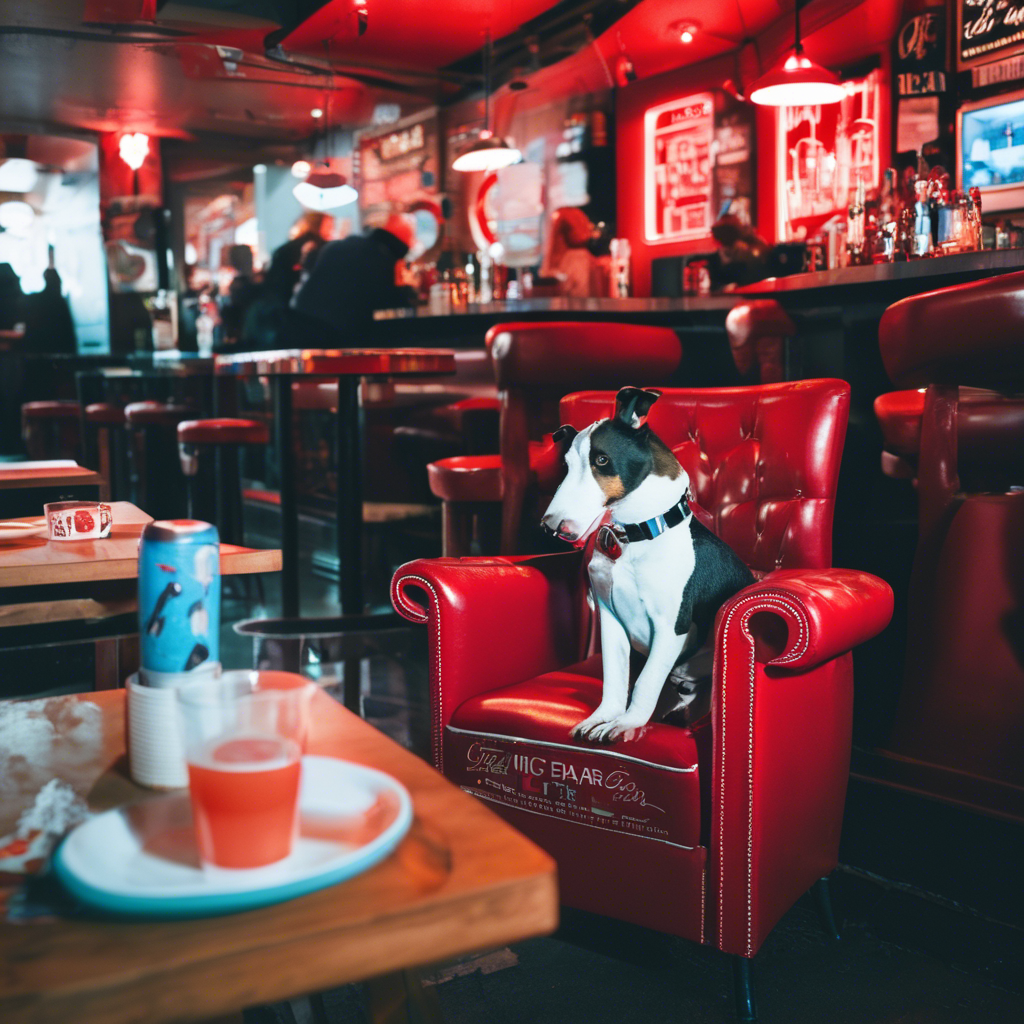

In [3]:
image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_adapter_diner.png")
generator = torch.Generator(device="cpu").manual_seed(0)
images = pipeline(
    prompt="a dog sitting in a chair drinking a bear",
    ip_adapter_image=image,
    negative_prompt="deformed, ugly, wrong proportion, worst quality, low quality",
    num_inference_steps=100,
    generator=generator,
).images
images[0]

# image-to-image

In [4]:
pipeline = AutoPipelineForImage2Image.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16).to("cuda")
pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="sdxl_models", weight_name="ip-adapter_sdxl.bin")
pipeline.set_ip_adapter_scale(0.6)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

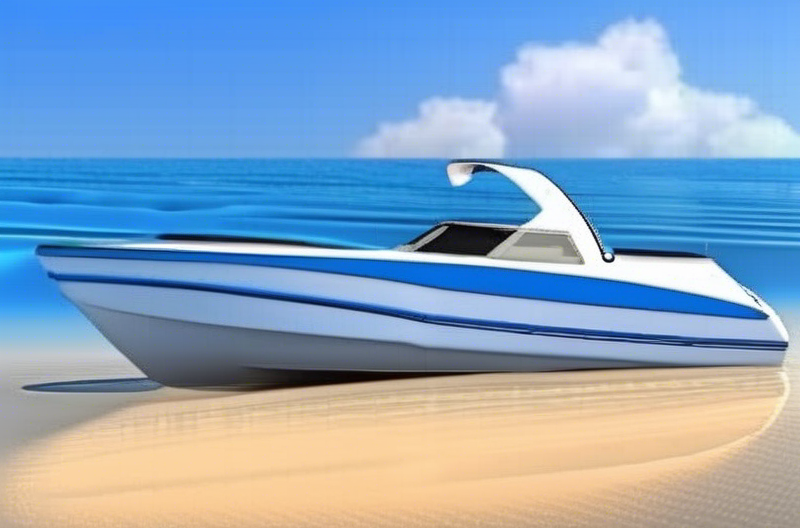

In [6]:
image = load_image("https://thumbs.dreamstime.com/b/beach-sea-18378306.jpg")
ip_image = load_image("https://5.imimg.com/data5/TV/DX/OW/SELLER-8265095/plastic-motor-boat-500x500.jpg")


generator = torch.Generator(device="cpu").manual_seed(6)
images = pipeline(
    prompt="best quality, high quality",
    image=image,
    ip_adapter_image=ip_image,
    generator=generator,
    strength=0.8,
).images
images[0]

# Face model

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

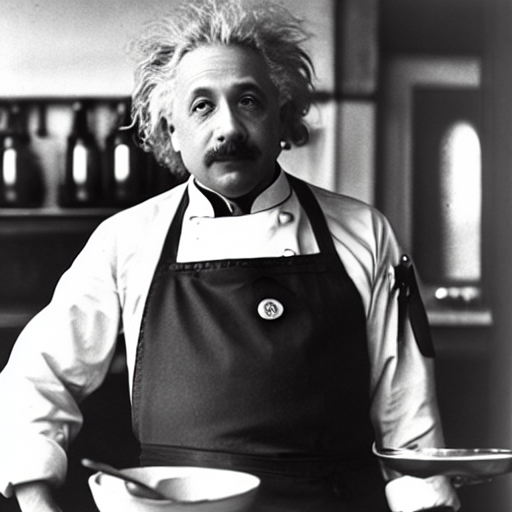

In [8]:
from diffusers import StableDiffusionPipeline, DDIMScheduler

pipeline = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
).to("cuda")
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)
pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="models", weight_name="ip-adapter-full-face_sd15.bin")

pipeline.set_ip_adapter_scale(0.5)

image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_adapter_einstein_base.png")
generator = torch.Generator(device="cpu").manual_seed(26)

image = pipeline(
    prompt="A photo of Einstein as a chef, wearing an apron, cooking in a French restaurant",
    ip_adapter_image=image,
    negative_prompt="lowres, bad anatomy, worst quality, low quality",
    num_inference_steps=100,
    generator=generator,
).images[0]
image

# InstantStyle

In [9]:
pipeline = AutoPipelineForText2Image.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16).to("cuda")
pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="sdxl_models", weight_name="ip-adapter_sdxl.bin")

scale = {
    "down": {"block_2": [0.0, 1.0]},
    "up": {"block_0": [0.0, 1.0, 0.0]},
}
pipeline.set_ip_adapter_scale(scale)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

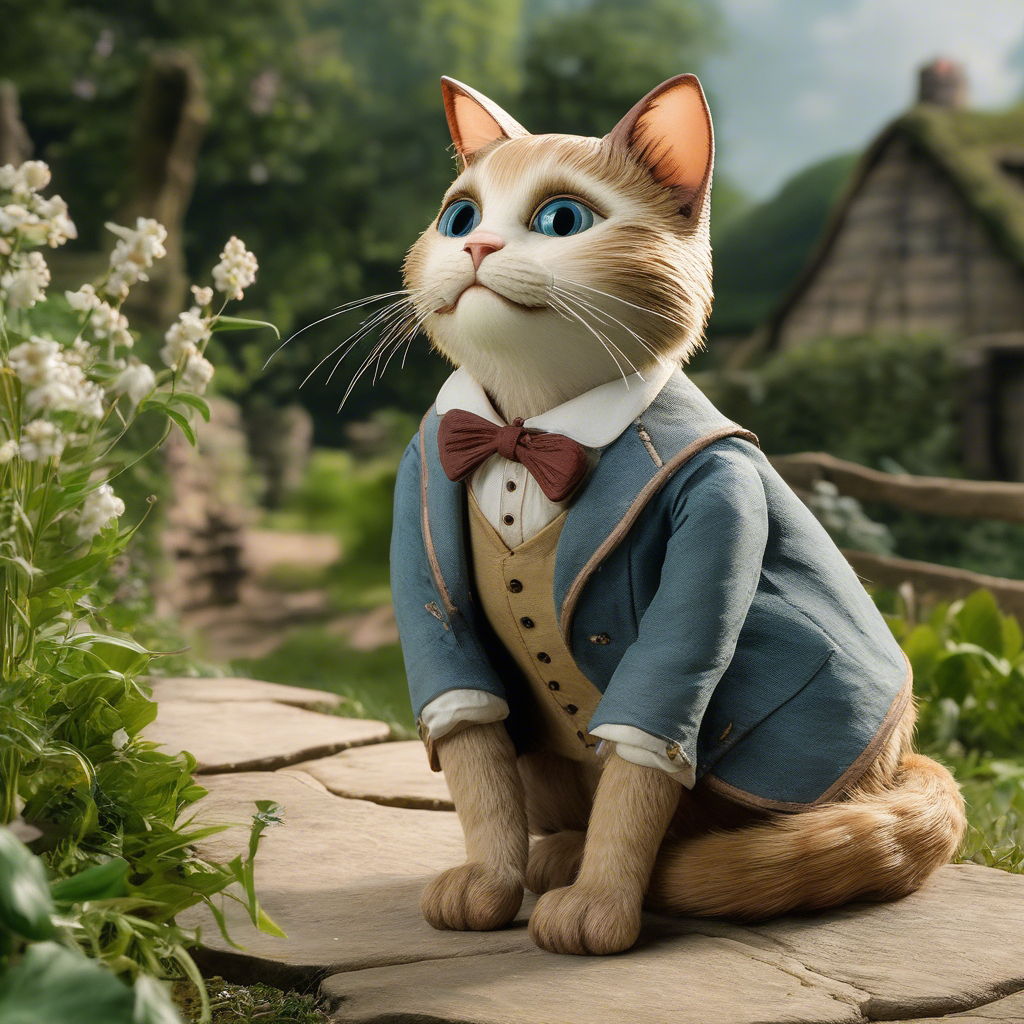

In [10]:
style_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/0052a70beed5bf71b92610a43a52df6d286cd5f3/diffusers/rabbit.jpg")

generator = torch.Generator(device="cpu").manual_seed(26)
image = pipeline(
    prompt="a cat, masterpiece, best quality, high quality",
    ip_adapter_image=style_image,
    negative_prompt="text, watermark, lowres, low quality, worst quality, deformed, glitch, low contrast, noisy, saturation, blurry",
    guidance_scale=5,
    num_inference_steps=30,
    generator=generator,
).images[0]
image